In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 2) # -4 ... 10 
print('SD:', SD)

SD: 0.03200000000000001


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'ABMD', 'ABNB', 'ANET', 'ATVI', 'AXON', 'AYX', 'BILI', 'BYND', 'COUR',
    'CPNG', 'DDOG', 'DOCU', 'EDIT', 'ETSY', 'FSLY', 'FUV', 'GH', 'GMED', 
    'INTG', 'ISRG', 'JD', 'LULU', 'LUV', 'MDB', 'MELI', 'MNST', 'MTCH', 
    'NVCR', 'OKTA', 'PANW', 'PINS', 'PTON', 'QDEL', 'RDFN', 'RGEN', 
    'ROKU', 'SE', 'SHOP', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 
    'TWTR', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

49

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = datetime.now().date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 7, 9))

In [6]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['OKTA', 'PANW', 'PINS', 'PTON', 'QDEL', 'RDFN', 'RGEN', '^IXIC']

In [7]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  8 of 8 completed
Generating derived columns...
   ...OKTA
   ...PANW
   ...PINS
   ...PTON
   ...QDEL
   ...RDFN
   ...RGEN
   ...^IXIC


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 OKTA
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 7.9588215690742965
Refitting current best...
Current best ma returns: 8.4702857309061
Fraction Invested: 0.9965920814906651
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 8.470513048440928
Invested: 0.9965920814906651
New best: 8.538490541767702
Invested: 0.9965920814906651
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 7.9588215690742965
Refitting current best...
Current best ew_ma returns: 9.63974214775405
Fraction Invested: 1.0
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 9.642575839044579
Invested: 1.0
Round: 50


Beginning rel_minmax method...
-------------------------

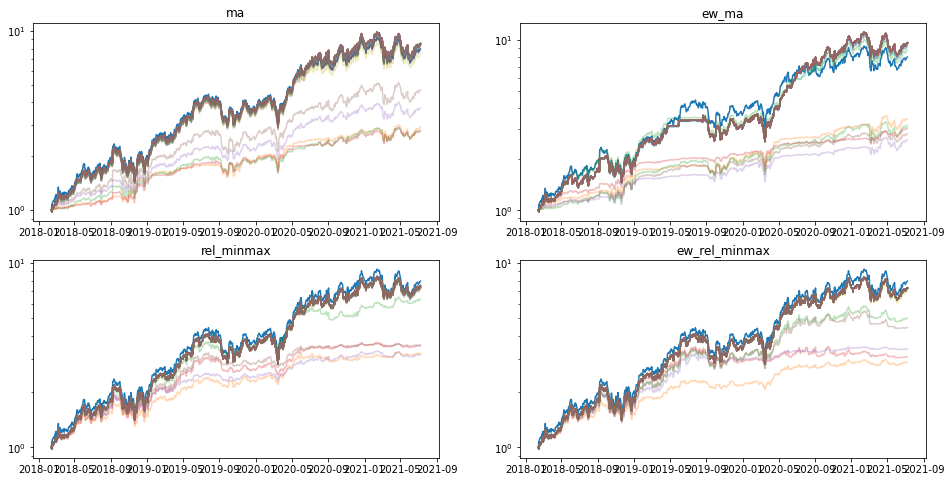

Saving OKTA params...



----------------------------------------------------------------------
                                 PANW
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 6.483979295556418
Refitting current best...
Current best ma returns: 7.657419526634401
Fraction Invested: 0.9941775755782027
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 7.657422482312964
Invested: 0.9941775755782027
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 6.483979295556418
Refitting current best...
Current best ew_ma returns: 6.613866449079193
Fraction Invested: 0.9921462738627734
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 6.613871300385062
Invested: 0.9921462738627734
New best: 6.6139644341800015
Invested: 0.9921462738627734
New best: 6.61

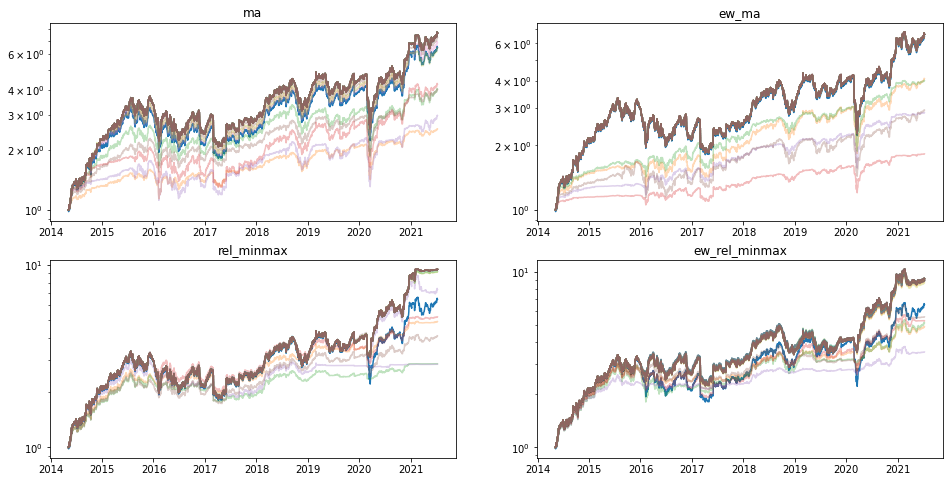

Saving PANW params...



----------------------------------------------------------------------
                                 PINS
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 2.8633961227704896
Refitting current best...
Current best ma returns: 3.0441044200676357
Fraction Invested: 0.9976918072778268
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 3.0486106753226045
Invested: 0.9976918072778268
New best: 3.245855287073397
Invested: 0.9976918072778268
New best: 3.246266679232578
Invested: 0.9976918072778268
New best: 3.2463413329691044
Invested: 0.9976918072778268
New best: 3.246392199971919
Invested: 0.9976918072778268
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 2.8633961227704896
Refitting current best...
Current best ew_ma returns: 3.474779839324613

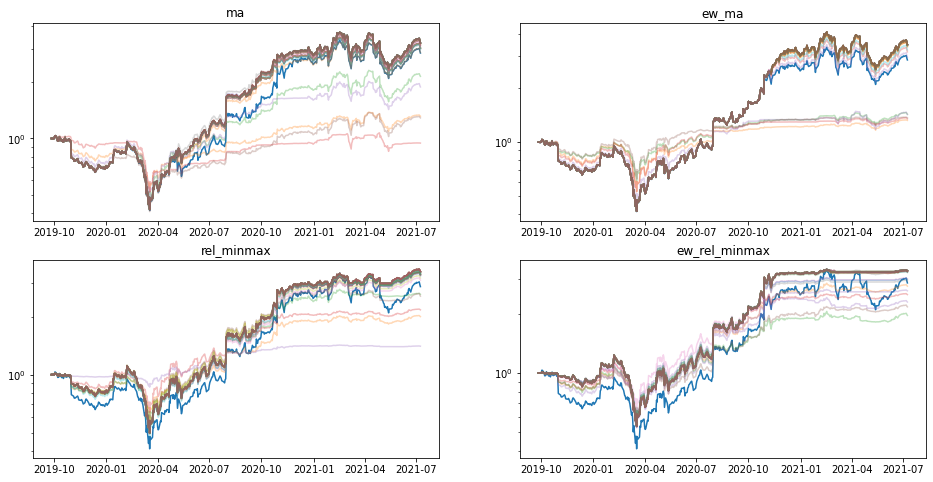

Saving PINS params...



----------------------------------------------------------------------
                                 PTON
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 3.706602719866514
Refitting current best...
Current best ma returns: 5.185753780418553
Fraction Invested: 0.9979011863268918
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 5.185757604984891
Invested: 0.9979011863268918
New best: 5.32076235897172
Invested: 0.9979011863268918
New best: 5.321003433002997
Invested: 0.9979011863268918
New best: 5.321004100688372
Invested: 0.9979011863268918
New best: 5.321027305158271
Invested: 0.9979011863268918
New best: 5.321100671138877
Invested: 0.9979011863268918
New best: 5.321164148683824
Invested: 0.9979011863268918
Round: 50


Beginning ew_ma method...
--------------------------------------------------
D

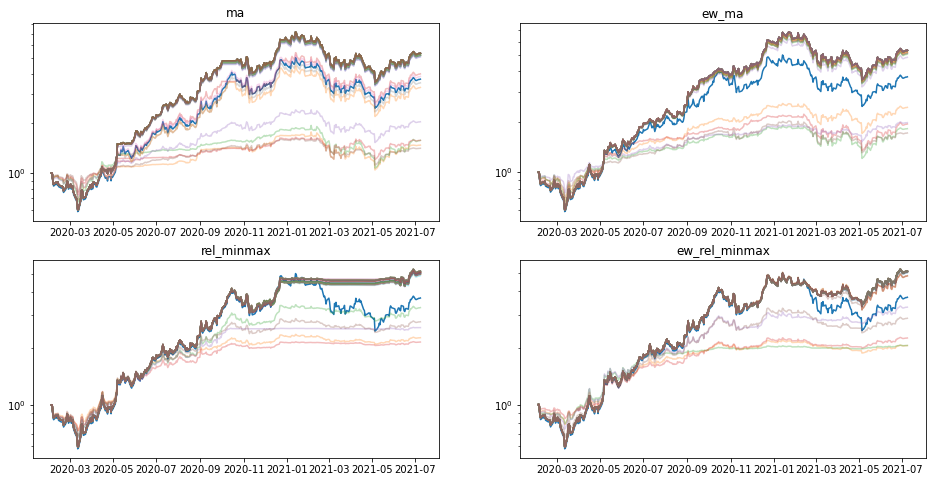

Saving PTON params...



----------------------------------------------------------------------
                                 QDEL
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 25.194805194805195
Refitting current best...
Current best ma returns: 85.20147523248511
Fraction Invested: 0.605287199552228
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 87.3876404665588
Invested: 0.605287199552228
New best: 87.42905631144299
Invested: 0.605287199552228
New best: 87.77596116244464
Invested: 0.605287199552228
New best: 88.70498112625975
Invested: 0.605287199552228
New best: 91.30451558586063
Invested: 0.605287199552228
New best: 92.80383324729229
Invested: 0.605287199552228
New best: 93.00276486205058
Invested: 0.605287199552228
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothi

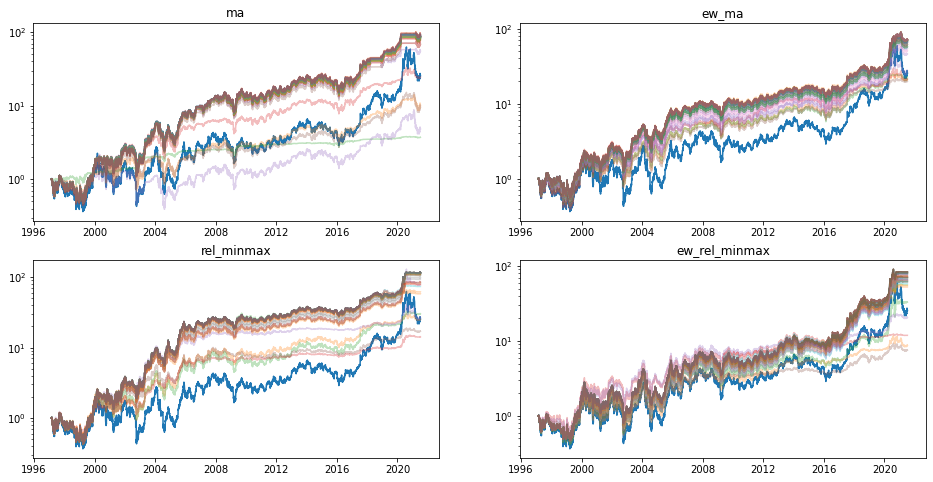

Saving QDEL params...



----------------------------------------------------------------------
                                 RDFN
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 2.679162931719498
Refitting current best...
Current best ma returns: 3.3195581811388424
Fraction Invested: 0.9932423189866589
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 3.3206834342557685
Invested: 0.9932423189866589
New best: 3.330018215247299
Invested: 0.9932423189866589
New best: 3.330019723194786
Invested: 0.9932423189866589
New best: 3.3336882804729515
Invested: 0.9932423189866589
New best: 3.337719039402902
Invested: 0.9932423189866589
New best: 3.337721677258889
Invested: 0.9932423189866589
New best: 3.337738918307525
Invested: 0.9932423189866589
New best: 3.337747904606669
Invested: 0.9932423189866589
New best: 3.3410554100714656


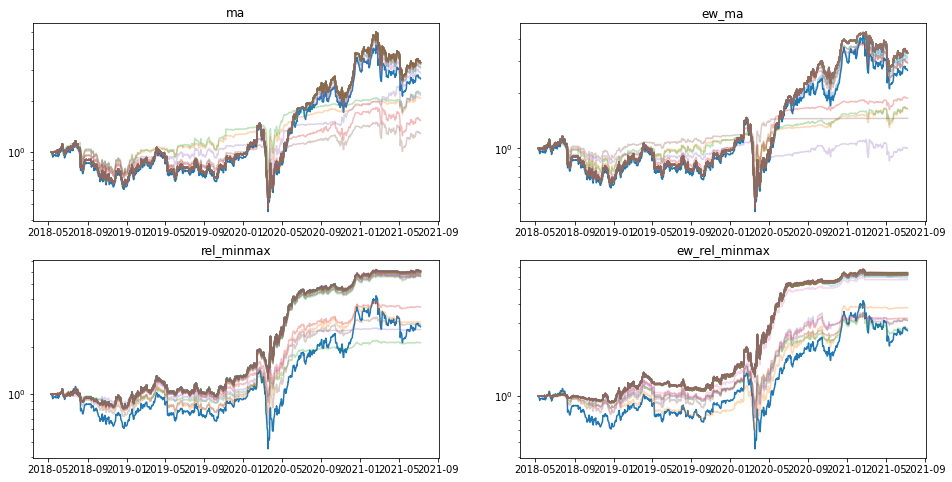

Saving RDFN params...



----------------------------------------------------------------------
                                 RGEN
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 29.48000008719308
Refitting current best...
Current best ma returns: 239.59391854984875
Fraction Invested: 0.5806379887748467
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 239.94286766154377
Invested: 0.5806379887748467
New best: 239.9553788145301
Invested: 0.5806379887748467
New best: 239.9945444142491
Invested: 0.5806379887748467
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 29.48000008719308
Refitting current best...
Current best ew_ma returns: 383.1891292124386
Fraction Invested: 0.4961340871650296
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 383

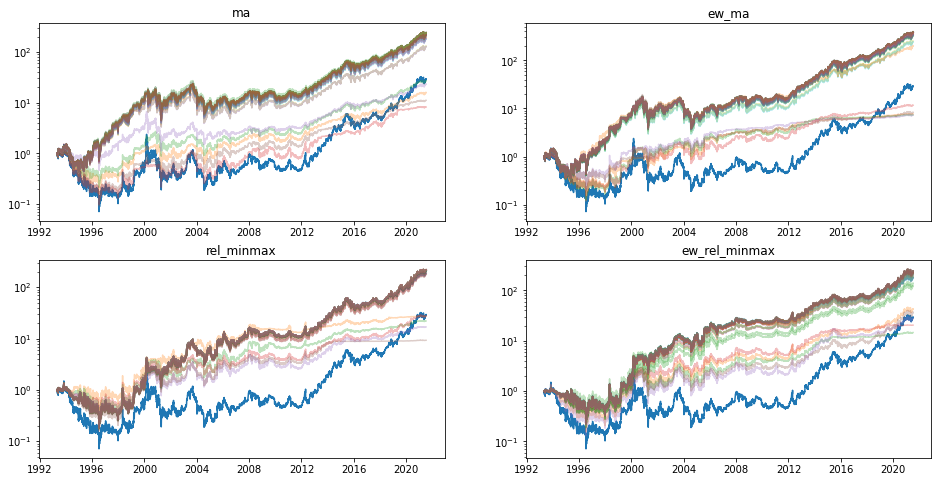

Saving RGEN params...



----------------------------------------------------------------------
                                 ^IXIC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 34.915540224070746
Refitting current best...
Current best ma returns: 44.56853868073648
Fraction Invested: 0.9940104466897488
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 44.5699260319321
Invested: 0.9940104466897488
New best: 44.56994489410473
Invested: 0.9940107880613743
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 34.915540224070746
Refitting current best...
Current best ew_ma returns: 43.08639080523714
Fraction Invested: 0.994672157936413
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 43.088384239735674
Invested: 0.994672157936413
Round: 50


Be

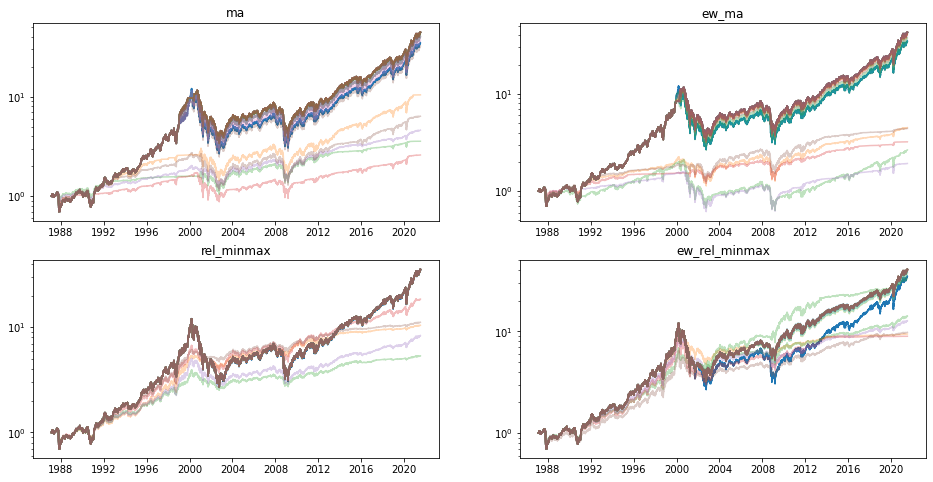

Saving ^IXIC params...


In [14]:
N_RAND = 5
N_ADJ = 50

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    best_params, best_returns = read_best_params(stock)
    stock_data = get_stock_data(stock, data)
    if stock == 'INTG':
        stock_data.fillna(method='ffill', inplace=True)
        stock_data.fillna(method='bfill', inplace=True)
    qp = QPercent(stock_data, 
                  N_CUTS, 
                  best_param_set=best_params, 
                  best_returns=best_returns, 
                  sd=SD)
    qp.run_sims(N_RAND, N_ADJ)
    best = get_best_param_set(qp)
    save_best_param_set(best, stock)

In [15]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [16]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


OKTA:
  Best Return: 9.642575839044579 (ew_ma)
  100.00% in

PANW:
  Best Return: 9.465102474768571 (rel_minmax)
  12.65% in

PINS:
  Best Return: 3.491068924119104 (ew_ma)
  99.56% in

PTON:
  Best Return: 5.340884710187947 (ew_ma)
  99.70% in

QDEL:
  Best Return: 115.64034447910325 (rel_minmax)
  31.93% in

RDFN:
  Best Return: 6.441537776415749 (ew_rel_minmax)
  0.32% in

RGEN:
  Best Return: 391.3862962970595 (ew_ma)
  49.61% in

^IXIC:
  Best Return: 44.56994489410473 (ma)
  99.40% in


In [17]:
!say qp is dunzo

IXIC: Nasdaq